# **Car price prediction**

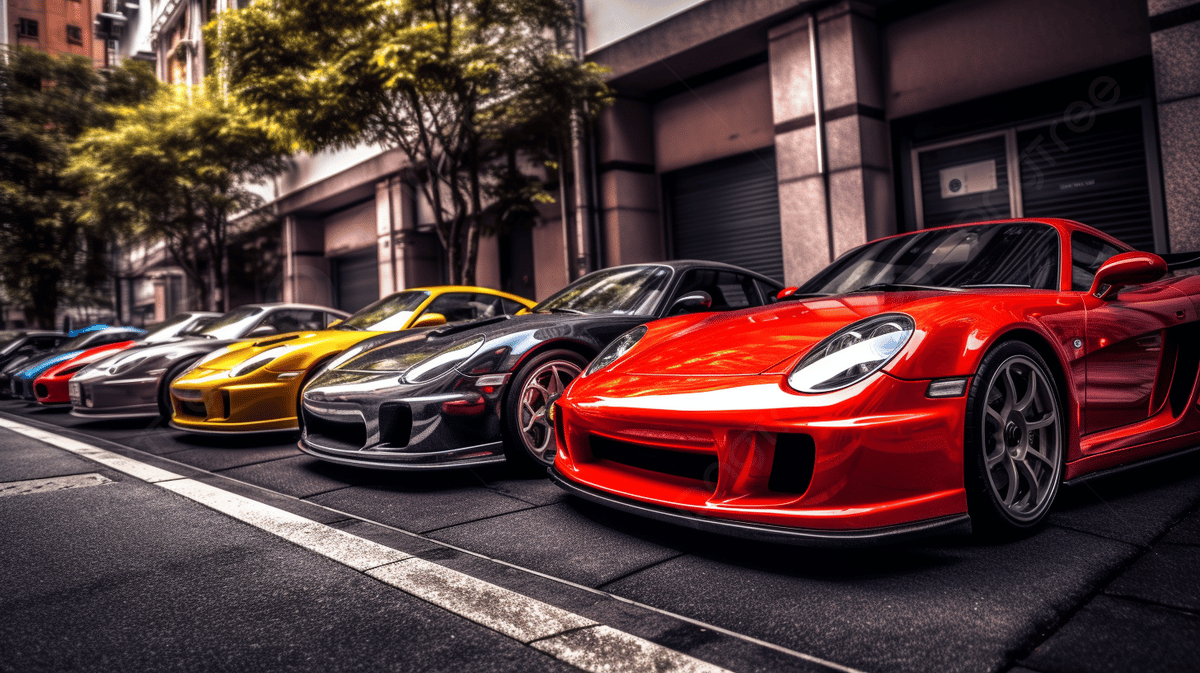

# **STEP 0. IMPORTING LIBRARY**

In [2]:
# STEP 0: import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#modules
from sklearn.preprocessing import StandardScaler

#normal lib
from statistics import mean
import joblib
import seaborn as sns
from sklearn.metrics import root_mean_squared_error

# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

# **STEP 1. LOOK AT THE BIG PICTURE**

The demand for cars in the world today is very high which leads to car prices being varied significantly. Car prices are influenced by different factors ranging from the model, type of the vehicle and external market condition. For example: fuel efficiency, performance and brands play an inportant role in pricing. Besides that, factors such as mordern technology, safety features and manufacturer warranties usually make the car more expensive. On the other hand, used cars can be consider to be more affordable to users based on mileage, market demand and condition. In general, car prices are determined by technological advancements, user requirments, trends and other economic factors. 

From the dataset, car prices are pridicted from 16 features: `Levy`, `Manufacturer`, `Model`, `Production Year`, `Category`, `Leather interior`, `Fuel type`, `Engine Volume`, `Mileage`, `Cylinders`, `Gear box type`, `drive wheels`, `doors`, `wheel`, `colors` and `air bag`. 

# **Step 2. GET THE DATA**


The dataset named “Car Price Prediction Challenge” and this is the link: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data 

  

In [3]:
raw_data = pd.read_csv(r'car_price_prediction.csv')

# **Step 3. DATA ANALYSE**

## 3.1. Raw Data Exploration
During the process of analyzing the dataset, there are attributes include incorrect values which leads to the accuracy of the output, which explains that reformating some data is essential. 

The dataset contains 19,237 rows (sample) and 18 columns (attribute). The attributes data include: Categorical Data, which are Normal and Ordinal Data; and Numerical Data, which are 
Discrete Data and Continuous Data. 

**Categorical data (13):** Levy, Manufacturer, Model, Category, Leather Interior, Fuel type, Engine volume, Mileage, Gear box type, Drive wheels, Doors, Wheel and Color 

**Numerical data (5):** ID, Price, Prod. year, Cylinders, Airbags 

To solve the problem of car price prediction, we choose 'Price' as the labelled feature, and build models with datasets to predict this variable.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## 3.2. Data Cleanup

**Missing value, blank space**
The objective is the define any missing value throughout the dataset. The ‘isnull()’ function, which evaluates each cell in the dataset to determine whether it contains a missing value, represented as ‘NaN’ (Not a Number). The final output displays the total number of missing values for each column in the dataset. At this stage, there are no missing value.  

In [5]:
#data cleanup
print("Null values: ")
print(raw_data.isnull().sum())

Null values: 
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


**Duplicate rows:**
We erase the duplicate rows, which may cause bias to the training process.

To know whether there are missing values, duplicated() is used to detect data that appears more then one time.


In [6]:
#duplicate rows
print("Duplicate rows: ")

duplicate_rows = raw_data[raw_data.duplicated()]
print(duplicate_rows)

Duplicate rows: 
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG   

Consequently, there are 313 rows of duplicated data exist. The cell below is used to drop those duplicates.

In [7]:
# Remove duplicate rows
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

**For ‘ID’ attribute:**

Data value in ‘ID’ column presents a unique identifier for each car in the dataset. Although it represents different car types, brands and models, it is not useful for analysis and data prediction because it is just a string of numbers and perform no specific or definite connection to other varibles.  

It does not contribute any aspects about the characteristics of the car nor the prediction of the price of the car. Therefore, it should be removed because it is unnecessary and does not affect the connection between other varibles and avoid overfitting in model prediction. 

  

Overall: 

- Mileage: is processed to presents only numbers (e.g., 200000 instead of 200000km) 

- Engine volume: processed to presents only engine size in numerical data (e.g., 2.5) and column Turbo is added to with only ‘Yes’ or ‘No’ feature. 

- Levy: Replace all missing values with 'NaN', and convert the features to numeric

- Doors: Data presents only numeric value (number of doors) (e.g.,  2, 3, 4, 5) 

- ID: Removed as unnecessary 

In [8]:
#drop the ID column
raw_data = raw_data.drop(columns = "ID")

**For ‘Levy’ attribute:** 

As mention before, the dataset doesn’t include any missing values. However, in the ‘Levy’ column, we discovered that the symbol ‘ – ‘presents missing value. This is a critical issue that requires resolution because car prices increase based on taxes such as environmental charges, luxury taxes and excise duties. These costs are mostly passed on car owners, which leads to increasing in car price, especially imported or high- emission vehicles. 

  

To solve this issue, we use function ‘replace (‘- ‘, np.nan)’ to replace any dash as missing value.  Then, the ‘pd.to_numeric ()’ function is applied to convert the whole column into numerical data value. 

The ‘Levy’ attribute is performed in fully numeric, more clear and easier for data and statistical analysis. 

In [9]:
# set the missing value as 0, and change a whole column to numeric data
raw_data['Levy'] = raw_data['Levy'].replace('-', np.nan) # set into mean when cell = 0
raw_data['Levy'] = pd.to_numeric(raw_data['Levy'])

**Impute:**

Because SimpleImputer with median strategy cannot fully evaluate the dataset, KNNImputer technique has been used.

To handle the missing value that is previously set to 0, KNNImputer technique is used to fill that cell. The KNNImputer works by finding the k - nearest neighbors for the data points with mising value, then it imputes by using the mean or median of the neighboring data points. This method preserves the relationship amongst features, which can lead to better model performance.

In [10]:
# impute the missing value, fix them by knn methods
from sklearn.impute import KNNImputer

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
raw_data['Levy'] = impute.fit_transform(raw_data['Levy'].values.reshape(-1,1))
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

**For ‘Doors’ attribute:** 

In the dataset, the ‘Doors’ column presents the number of doors in each vehicle. However, there are errors in the data values.  

We use ‘str.replace’ to replace any of the unreasonable values into the correct one: 
- Replace ‘May’ with ‘5’ 
- Replace ‘Mar’ with ‘3’ 
- Replace ‘04’ with ‘4’ 
- Replace ‘02’ with ‘2’ 

This step ensures that all values appear in the ‘Doors’ column with present as numerical data. For example, if the cars have ‘Mar’ number of doors, it is corrected to ‘3’. 

We also set the 'Doors' attributes into category be cause the data is discrete from each other.

In [11]:
#production year to be a string (EDIT GENERAL)
raw_data['Doors'] = raw_data['Doors'].str.replace('May', '5')
raw_data['Doors'] = raw_data['Doors'].str.replace('Mar', '3')
raw_data['Doors'] = raw_data['Doors'].str.replace('04', '4')
raw_data['Doors'] = raw_data['Doors'].str.replace('02', '2')

#convert the doors features to category features
raw_data['Doors'] = raw_data['Doors'].astype('category')

**For ‘Engine volume’ attribute:** 

There are two types of value appear in this column: engines with Turbo and engines without Turbo. Turbo engines have smaller size compared to the non-turbo engines for the same output power. Besides that, Turbo engines force more air into the combustion chamber, resulting in higher power and torque compared to a (non-turbo) engine.  Moreover, engines with turbo results in higher acceleration and fuel efficiency but required higher complex machine operation and maintenance. 

In [12]:
# extracting the enginer volume
raw_data['Turbo'] = raw_data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
raw_data['Turbo'] = raw_data['Turbo'].map({1: 'Yes', 0: 'No'})

raw_data['Engine volume'] = raw_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

Non-turbo engine (Naturally aspirated engines) has simple design, lower upfront and long-term costs and produces less power overall. 

  

Create a new column named “Turbo” and checks if the word 'Turbo' appears in the 'Engine volume' column. If it does, set the value to 1 otherwise it is set to 0. The function ‘.map()’ then convert value ‘1’ and ‘0’ into ‘Yes’ and ‘No’. After that, it extract engine volume numerical value and convert into floating-point number. 

  

A new column ‘Turbo’ is created, indicating whether the care design has a turbo engine (Yes) or naturally aspirated engine (No). The ‘Engine volume’ is now only contain the engine size as numerical value and clear any other non-numeric value (Turbo). 

**For ‘Mileage’ attribute:** 

The data values such as 100000km or 200000km so we use the expression \d+, which looks for one or more digits. It then converts those extracted values into integers, removes any non-numeric characters like “km”. This will made those values become Continuous Data (Numerical Data) so that the next analysis step can give accurate results. 

In [13]:
#reformat data
#cleaning the mileague
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+)').astype(float)

**Converting the data:**

To make the feature easier to inspect and to measure the age of each car, we convert the production year to age, by taking current year, subtracted to the production year. Resulting in high prod. year means low age.

In [14]:
# convert the prod. year features to age
raw_data['Age'] = 2024 - raw_data['Prod. year']

# Assuming raw_data is your DataFrame
raw_data = raw_data.drop(columns=['Prod. year'])

**Inspect the data after modification**

The table illustrates the Count value, Mean, Std (Standard Deviation), Min/Max, Quartiles 

For example: 

- ‘Price’ Attribute analysis with value 

- Count (18924): number of cars have the listed price 

- Mean (18,587.44): The average price of the cars among the dataset 

- Std (192,135): This is an ‘alarming value’ for the price difference between vehicles. It shows that the dataset include extreme values (some cars are much more expensive compared to the rest) 

- Min/Max: There is a huge gap in the car price, indicates the difference between the luxury car brands and the normal one 

- Quartiles (13,172): 25% of the cars in total is less than 5,331 and 75% is less than 22,063

In [15]:
# Inspect the data after modification
print("Head: ")
print(raw_data.head())
print("Data insight: ")
raw_data.describe()

Head: 
   Price         Levy Manufacturer    Model   Category Leather interior  \
0  13328  1399.000000        LEXUS   RX 450       Jeep              Yes   
1  16621  1018.000000    CHEVROLET  Equinox       Jeep               No   
2   8467   906.299205        HONDA      FIT  Hatchback               No   
3   3607   862.000000         FORD   Escape       Jeep              Yes   
4  11726   446.000000        HONDA      FIT  Hatchback              Yes   

  Fuel type  Engine volume   Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid            3.5  186005.0        6.0     Automatic          4x4   
1    Petrol            3.0  192000.0        6.0     Tiptronic          4x4   
2    Petrol            1.3  200000.0        4.0      Variator        Front   
3    Hybrid            2.5  168966.0        4.0     Automatic          4x4   
4    Petrol            1.3   91901.0        4.0     Automatic        Front   

  Doors             Wheel   Color  Airbags Turbo  Age  
0   4-5        Le

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
count,1.892400e+04,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,906.299205,2.306251,1.555373e+06,4.580216,6.568379,13.085764
std,1.921356e+05,387.152014,0.877591,4.880221e+07,1.200223,4.322323,5.665749
min,1.000000e+00,87.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,5.331000e+03,730.000000,1.800000,7.019575e+04,4.000000,4.000000,9.000000
50%,1.317200e+04,906.299205,2.000000,1.264000e+05,4.000000,6.000000,12.000000
75%,2.206300e+04,917.000000,2.500000,1.891198e+05,4.000000,12.000000,15.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,16.000000,85.000000


**Numerical and Categorical features:**

To present data as Numerical features and Categorical features, we retrieves all numerical columns from the dataset and extracts these columns  named ‘num_cols’. For categorical data types, subtracting all the stored numerical column from total column, which results in categorical column. It is clearly to analyze the structure in addition to data features. 

In [16]:
cols=raw_data.columns
num_cols = raw_data._get_numeric_data()
num_cols= list(num_cols.columns)
cat_cols = list(set(cols) - set(num_cols))
cat_cols.sort()

print(f"Numerical features: {num_cols}")
print(f"Categorical features: {cat_cols}")

Numerical features: ['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']
Categorical features: ['Category', 'Color', 'Doors', 'Drive wheels', 'Fuel type', 'Gear box type', 'Leather interior', 'Manufacturer', 'Model', 'Turbo', 'Wheel']


**Cylinders:**

Car’s cylinders are important components during the operation process; it is where fuel combustion occurs. The pistons move up and down and convert energy from the combustion into mechanical power. The number of cylinders dirrectly affect the output power and fuel efficiency.  

Demonstrate the frequency count of each unique value is helpful to identify the distribution of this variable (Number of cars with specific number of cylinders).

It is clear that most of the value lies on 4.0. 

In [17]:
print(raw_data['Cylinders'].value_counts()) 

Cylinders
4.0     14159
6.0      3373
8.0       976
5.0       169
3.0       107
2.0        42
12.0       38
1.0        37
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64


**Histogram analysis of numerical attributes:**

- Price: The distribution is skew to the left, which explains that most cars in the dataset have lower price compared to the others 

- Levy: The distribution is strongly skew to the left, indicates that many cars have low and either no levy value. This is also related to the dataset errors as some missing values appear as symbol ‘- ‘. Besides that, there also extreme values for luxury cars. 

- Age: The distribution is significantly skew to the left as cars that produced before 1980 tend to be less purchase compared to cars that produced after 2000, which result in car with younger age is more likely to be placed on market.

- Engine Volume: The distribution indicates that most car engine volumn has the at small to average size (around 5 liters). Only a few number of cars has less or over 5 liters in engine volume, this is also explain why Sedan models are purchased in high quantities.  

- Mileage: This is the only attributes that has a relatively even distribution over all values. The number of cars with odo from 10000km to 13000km occupy the largest value, follow by 5000km to 8000km and 15000km to 20000km with the value around 1800 variables. 

- Cylinders: The distribution indicates that the engine volume size attribute is proportional to the number of cylinders. Most cars have 4 to 6 cylinders and only a few include 12 to 16. 

- Airbags: The graph distribution is relative to cars model, which can be considered that there are 2 variables with peak value: one for cars with 2 to 6 airbags (Sedan) and cars with more than 12 airbags. 

Overall, the histograms point out a significant number of skewness among the attributes in the dataset due to missing values, errors, extreme values, etc. However, the main purpose is to be able to visualize, analyze and evaluate unreasonable parts to be able to process data and ultilize the solution methods. 

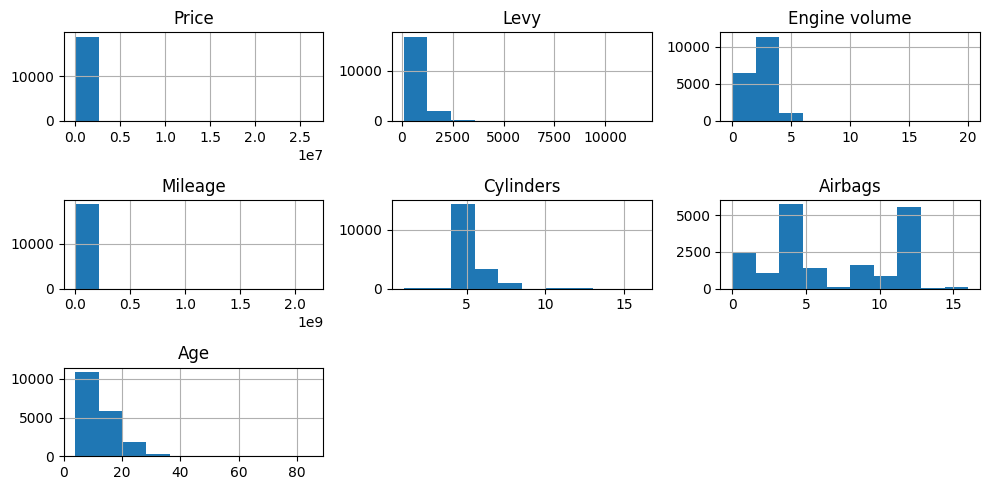

In [18]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

**Scatter plot**

Scatter matrix plot supports data analytics to visualize and compare relationship between numerical variables. Each plot in the matrix presents the corelation between two specific variables. By applying this method, it is easier to detect trends, outliers, and correlation such as positive correlation, negative correlation and no correlation. 

In this step, we import the scatter matrix from ‘pandas.plotting’ function to create a grid of scatter plots of each pair of the numerical values with visualization to present the relationship. The figure size is 12 in width and 8 in length to make the sketch more clearly and readable. ‘plt.tight_layout ()’ function is also used to make sure the matrix is clear without overlapping. 

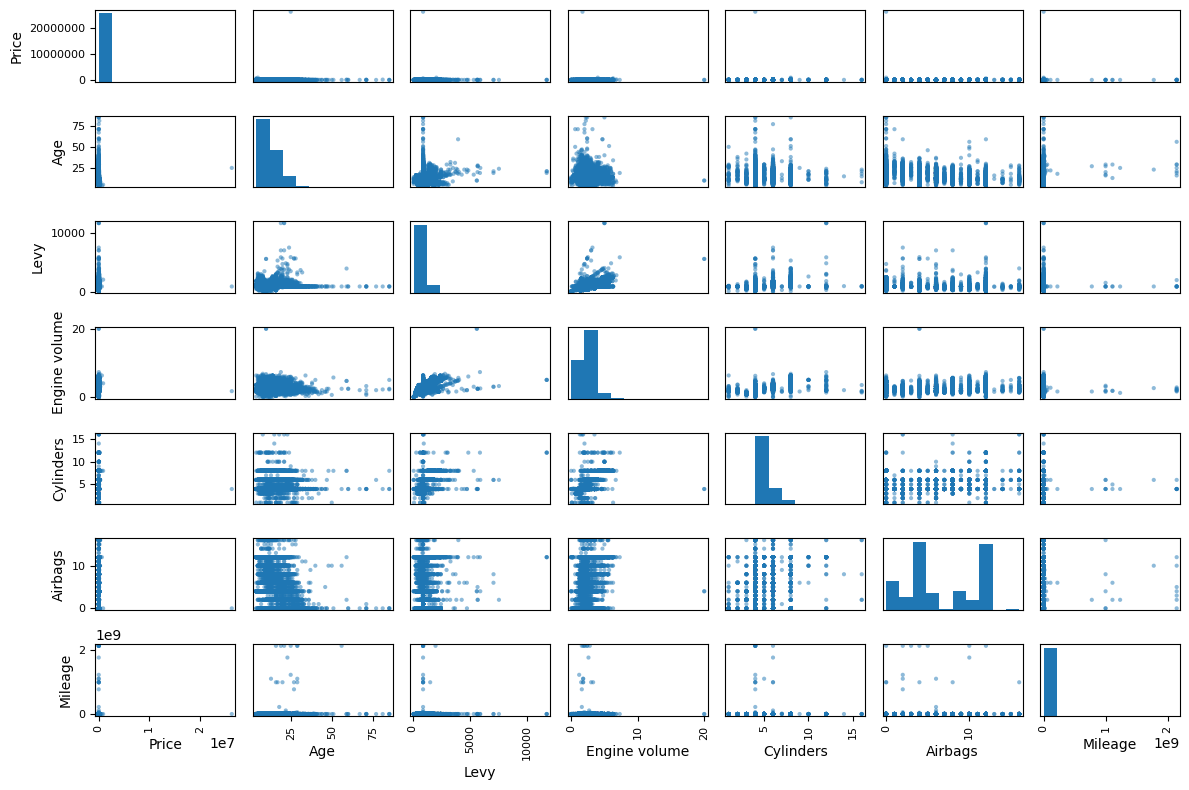

In [19]:
from pandas.plotting import scatter_matrix
def scatter(raw_data):
	attributes = ['Price', 'Age', 'Levy', 'Engine volume', 'Cylinders', 'Airbags', 'Mileage']
	scatter_matrix(raw_data[attributes], figsize=(12, 8))
	plt.tight_layout()
	plt.show()
scatter(raw_data)

In general, the scatter plot matrix illustrates the key features between numerical attributes. It also points out pairs of relationship that are unclear and imprecise and suggests the exist of complex correlation pairs that required adjustment 

- Engine volume vs Cylinder: The scatter plot presents strong linear relationship between these two features as higher engine volume required more cylinders. 

- Age vs Airbags: This is related to user safety aspects of vehicle operation, which explains that later production vehicles tend to have more airbags 

- Levy vs Engine Volume: The correlation of these two features indicates that bigger car with larger engine volume tend to pay more taxes or fees compared to smaller car. 

- Age vs Levy: older-aged production cars tend to have higher levies. It is due to the fact that new and mordern are more expensive. 

- Levy vs Cylinder: The correlation between levy and cylinder is not strong. However, it reflects that the owners of bigger cars with strong engines often pay more taxes. 

- Age vs Engine Volume: The correlation is slightly low but it shows the current trend of vehicle development in the world. This is related to the auto industry, more fuel efficiency in modern cars. 

- Air bags vs Cylinder: Bigger cars required more space for cylinders operation, which explains the more air bags required for safety issue. 

- Engine Volume vs Air bag: Similar to Cylinder attribute, bigger cars are produced with larger engine volume for operation, which made these features proportional to each other 

**Correlation between numerical attributes before refining dataset:** 

Analyse data value Correlation before refining 

Correlation refers to a statistical measure that presents the degree and direction of a linear relationship between two variables. For “numeric to numeric” data values, in the range [-1, 1], where 0 implies no correlation, 1 implies the peak correlation(as one variable increases, the other increases) and -1 means inverse correlation (as one variable increases, the other decreases) 

In [20]:
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix)

                  Price      Levy  Engine volume   Mileage  Cylinders  \
Price          1.000000  0.005509       0.008888 -0.001763   0.007435   
Levy           0.005509  1.000000       0.537900  0.008378   0.459803   
Engine volume  0.008888  0.537900       1.000000 -0.006292   0.777228   
Mileage       -0.001763  0.008378      -0.006292  1.000000  -0.001720   
Cylinders      0.007435  0.459803       0.777228 -0.001720   1.000000   
Airbags       -0.012709  0.067877       0.221991 -0.009174   0.174112   
Age           -0.012689  0.107800       0.032427  0.064058   0.099443   

                Airbags       Age  
Price         -0.012709 -0.012689  
Levy           0.067877  0.107800  
Engine volume  0.221991  0.032427  
Mileage       -0.009174  0.064058  
Cylinders      0.174112  0.099443  
Airbags        1.000000 -0.235160  
Age           -0.235160  1.000000  


**Correlation matrix and heat map:**

The project objective is to develop a car prediction model with highest accuracy so the team decided to move the ‘Price’ column to the end, make it easier to focus on as the final result. 

The ‘loc’ function is applied to rearrange the column order in the correlation matrix. Pair of correlation values with higher value will be display on top while the lowest pair will be place at the bottom. 

To make data analysis easier and more visual, we use ‘seaborn (sns.heatmap)’ to create a graphical presentaion called ‘Heat map’. The heat map includes the following aspects with explaination: 

Annot = True: Correlation numerical values are displayed on the map for visualize 

cmap='coolwarm': This tool is applied to identify the consistent of correlation with warm colors presents positive correlation and cool colors present negative correlation. The increase in correlation is proportional to the increase in color intensity. 

Rotation: The y-axis remains horizontal while the x-axis rotates 90 degrees to complete the matrix. 

                  Price      Levy  Engine volume   Mileage  Cylinders  \
Price          1.000000  0.005509       0.008888 -0.001763   0.007435   
Levy           0.005509  1.000000       0.537900  0.008378   0.459803   
Engine volume  0.008888  0.537900       1.000000 -0.006292   0.777228   
Mileage       -0.001763  0.008378      -0.006292  1.000000  -0.001720   
Cylinders      0.007435  0.459803       0.777228 -0.001720   1.000000   
Airbags       -0.012709  0.067877       0.221991 -0.009174   0.174112   
Age           -0.012689  0.107800       0.032427  0.064058   0.099443   

                Airbags       Age  
Price         -0.012709 -0.012689  
Levy           0.067877  0.107800  
Engine volume  0.221991  0.032427  
Mileage       -0.009174  0.064058  
Cylinders      0.174112  0.099443  
Airbags        1.000000 -0.235160  
Age           -0.235160  1.000000  

 Price            1.000000
Engine volume    0.008888
Cylinders        0.007435
Levy             0.005509
Mileage         -0.00

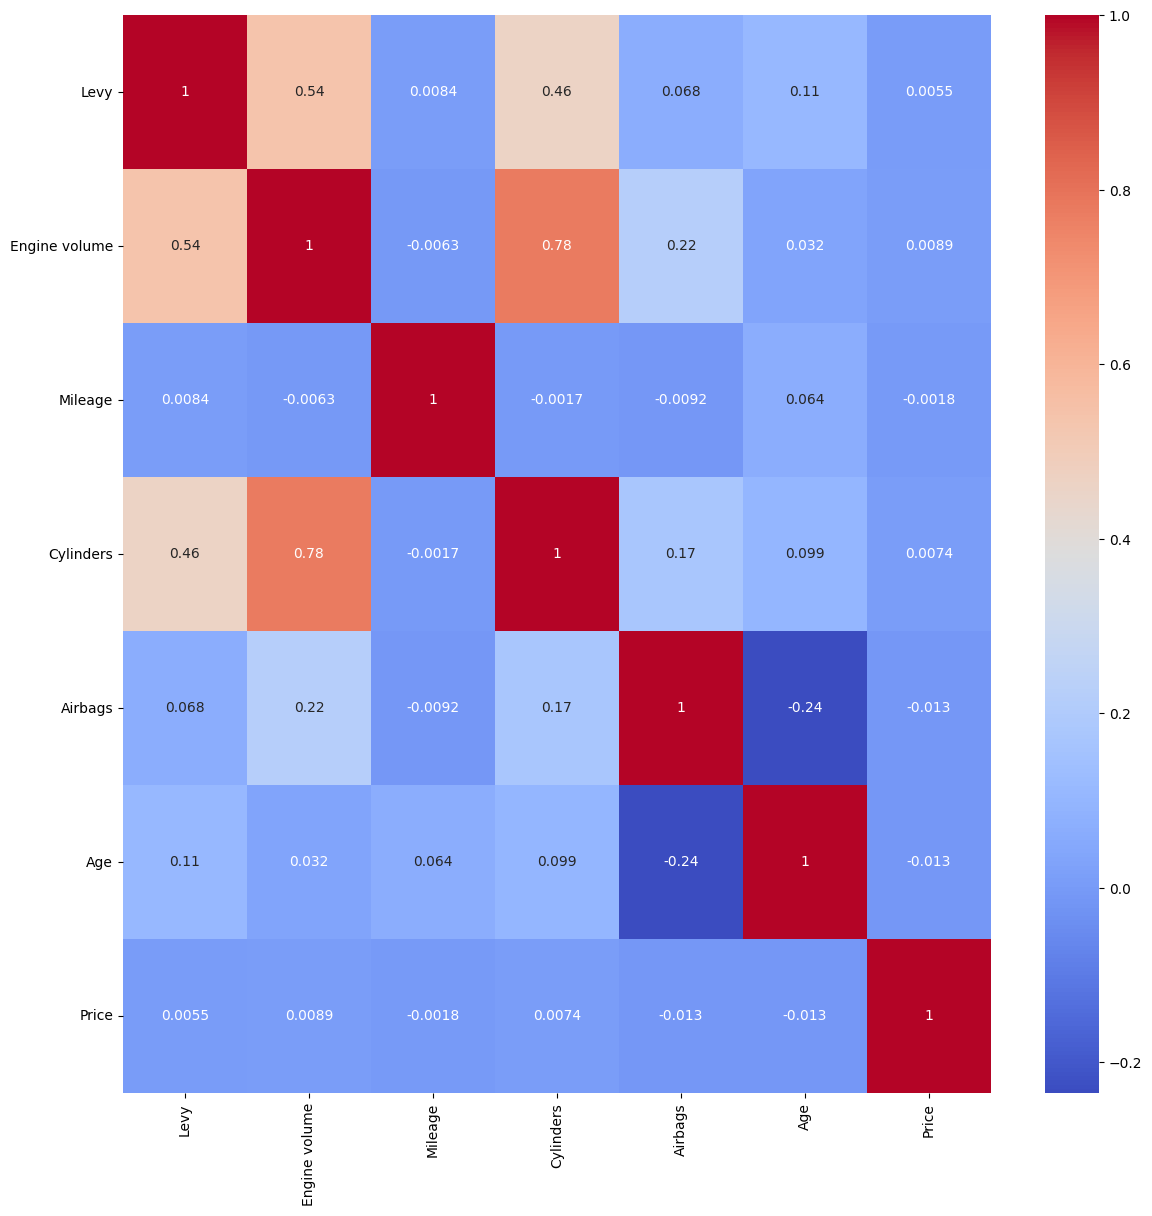

In [21]:
# Correlation matrix
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation between a feature and other features

columns = list(corr_matrix.columns)
columns.remove('Price')
columns.append('Price')
corr_matrix = corr_matrix.loc[columns, columns]

# Create a heatmap from the correlation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, fontsize=10)
# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=10)
plt.show()

**Create and analyse heat map:**

Heat map illustrates the correlation of the feature in pairs through x axis and y axis. The color gradient is helpful in identify strongness and weaknesss of the relationship. Besides that, dataa analyst can also identify patterns and clusters when dealing with numerical variables. 

  

**Top 5 most correlation:** 
- Engine volume vs Cylinders (0.7785): Highest correlation which explains that higher engine volume tends to have more cylinders. The correlation is presented in deep red color
- Levy vs Engine volume (0.54): Cars with larger engine volume tends to have higher levy. The correlation is presented in light red color. It is not as strong as the first pair but still present a positive relationship
- Cylinder vs Levy (0.46): 
- Airbags vs Age (-0.24): relationship between production year and airbags as ater production cars will often have more airbags. The correlation is shown in light blue, can considered as weak relationship. However, the negative correlation is not reasonable and required data process solutions.
- Levy vs Age (-0.36): Production year contributes in the decision of levy prices. The correlation is presented in pink color, indicates new and mordern cars usually have higher price due to levy. However, the negative correlation is not reasonable and required adjustment.

**Top 5 least correlation:**
- Price vs Levy (0.0055): Although it both mention about the cost to spend, but those features are no where corellated to each other, which presented in shine blue.
- Mileage vs Levy (0.0084): The correlation is presented dark blue as these two attributes are irrelevant in the final price of the car.
- Mileage vs Cylinders (-0.0017): This pair is low on corellation, meaning that they are not affecting each other.
- Price vs Airbags (-0.0128): This value need to have some adjustments because there is a relationship between these two features. The number of airbags are related to the car manufacturer and it is one of the key features that decide the car value. It should not be display at weak correlation in general.
- Price vs Mileage (-0.0018): This pair is also not correlated, too. But this is suspective, the low correlation might occurs because of the outliers.

These pair of variables displays almost or very weak correlation in car price prediction before removing outliers.

**Check normality of data before removing outliers**
The main purpose is to Focus on the normality of numeric variables in dataset and two key features: Skewness and Kurtosis. Skewness is the method of measuring the imbalance of distribution in values and Kurtosis is the method of demonstrates the skewness of distribution compared to a certain standard; usually heavy ‘tail’ or light ‘tail’. Besides that, to get a clearer and more accurate point of view, the team also calculate Mean, Median, Standard Deviation and Potential Normal.  

Overall, the airbags is the only features that is approximately normal distributed while other variables showing significant skewness and kurtosis, suggesting outliers, extreme values and asymmetrical distributions that required thoroughly prepare. 

In [22]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable   Skewness     Kurtosis          Mean         Median  \
0           Levy   6.555244   124.414365  9.062992e+02     906.299205   
1  Engine volume   2.208051    19.555731  2.306251e+00       2.000000   
2        Mileage  38.578517  1572.672121  1.555373e+06  126400.000000   
3      Cylinders   2.107707     6.587165  4.580216e+00       4.000000   
4        Airbags   0.086344    -1.332103  6.568379e+00       6.000000   
5            Age   2.088595    11.450244  1.308576e+01      12.000000   

        Std Dev  Potential Normal  
0  3.871520e+02             False  
1  8.775910e-01             False  
2  4.880221e+07             False  
3  1.200223e+00             False  
4  4.322323e+00              True  
5  5.665749e+00             False  


## 3.3. EDA on categorical features

To perform the distribution of categorical features based on Exploratory Data Analysis (EDA), we used ‘for loop’ function to concentrate on each specific features with categorical values from the dataset. 

There are 11 charts in total with the size is set to 8x6 and each of them represent the specific categorical features. The library (sns.countplot) is used to create a count plot with the purpose of demonstrating the frequency of each category in a categorical attribute. For example, in the column ‘Model’ (e.g., “RX350”, “Santa FE”) this will show the number of each value appear in the dataset. 

To optimize the distribution of each variables, we labeled the x-axis with the name of the attribute and y-axis is the frequency. The graphs also display with title (e.g., Distribution of Gear box type) 

Overall, the 11 histograms allow the team to detect if the data is imbalanced, extreme values such as one vehicle’s model occupy large number compared to the rest. 

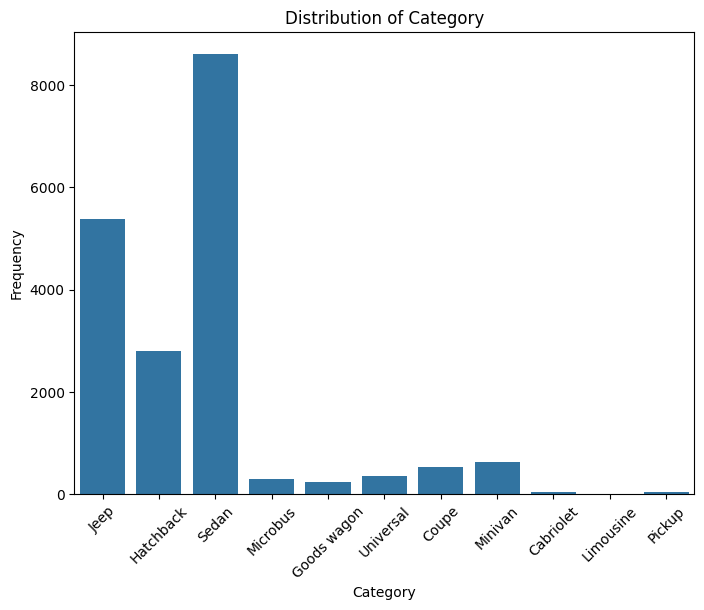

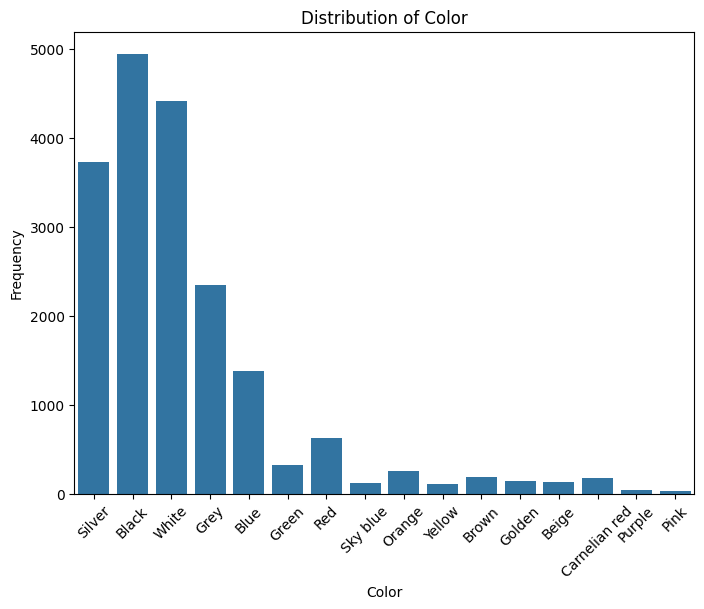

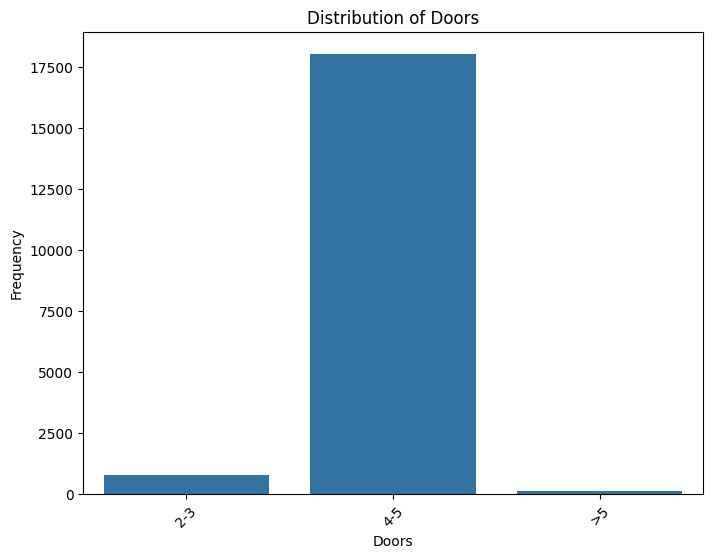

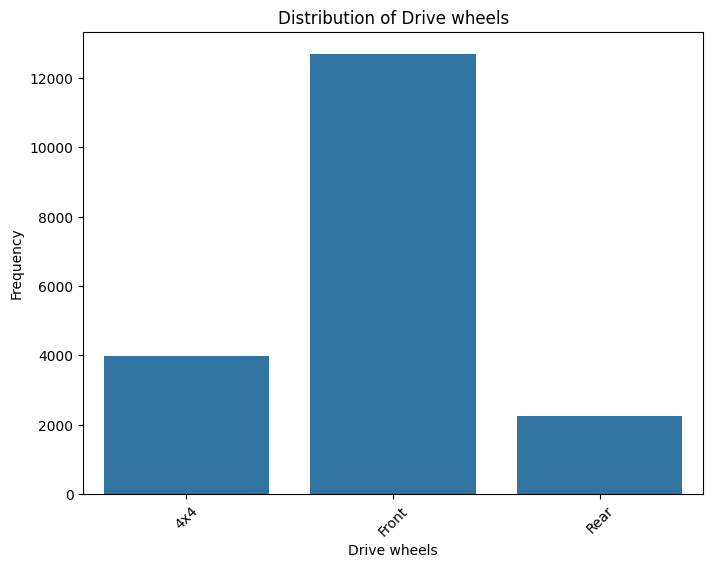

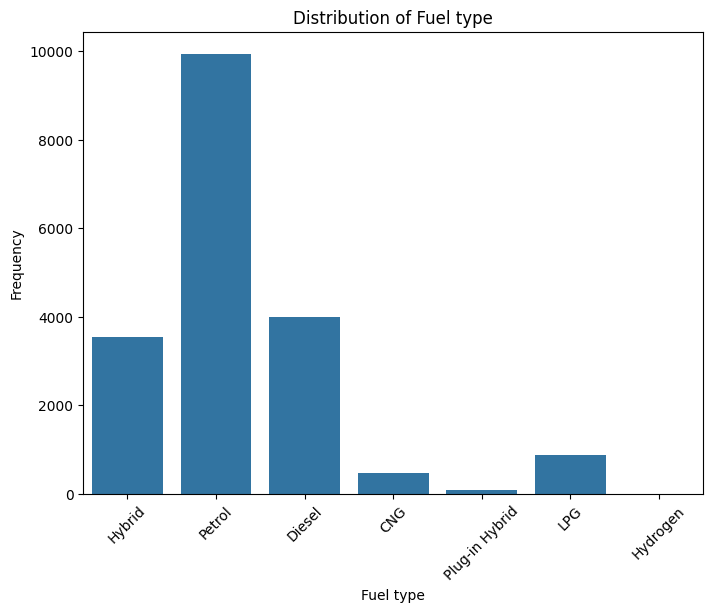

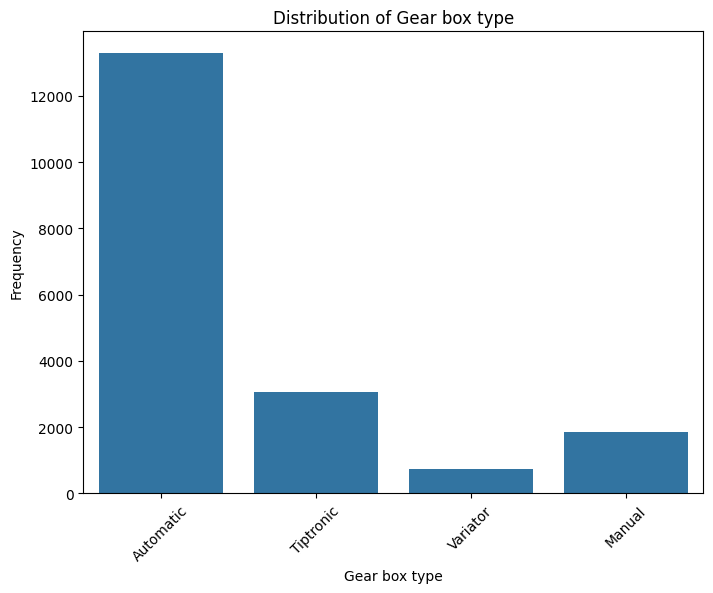

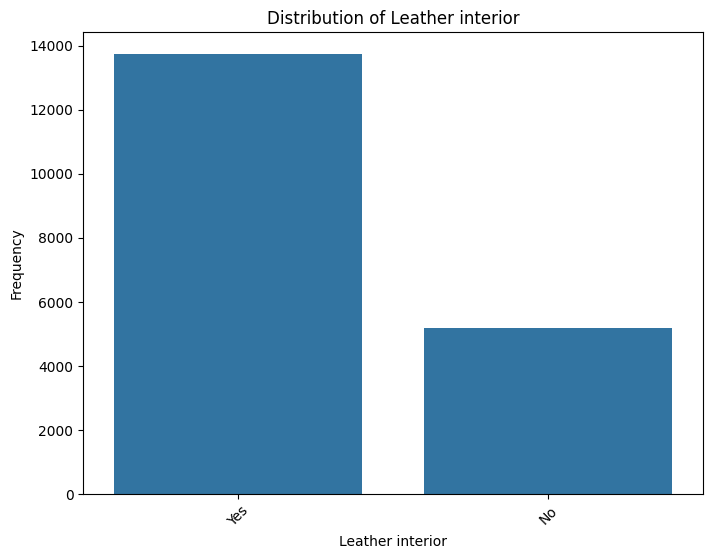

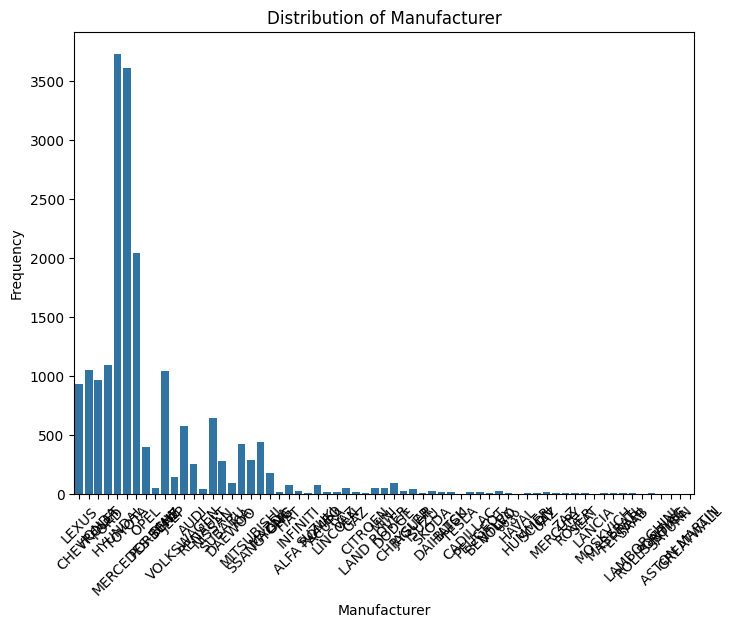

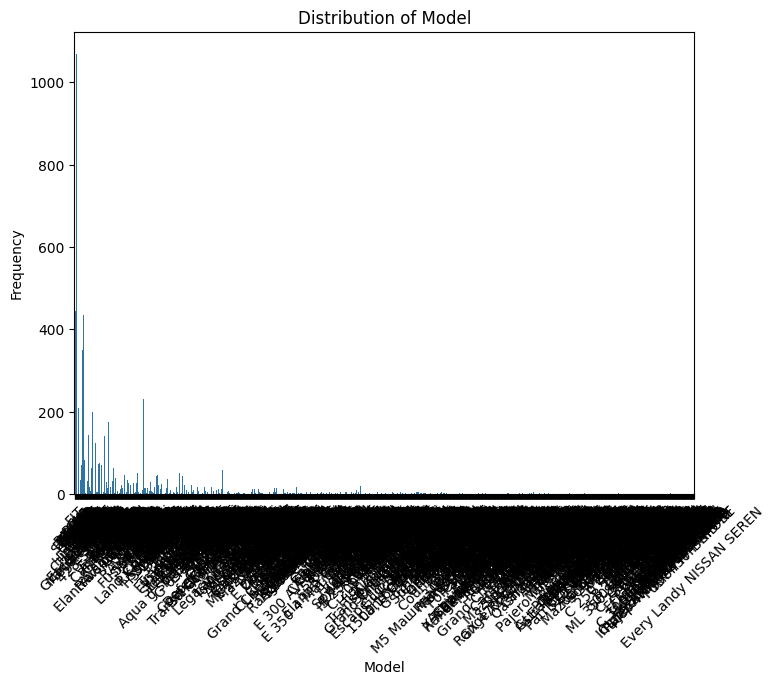

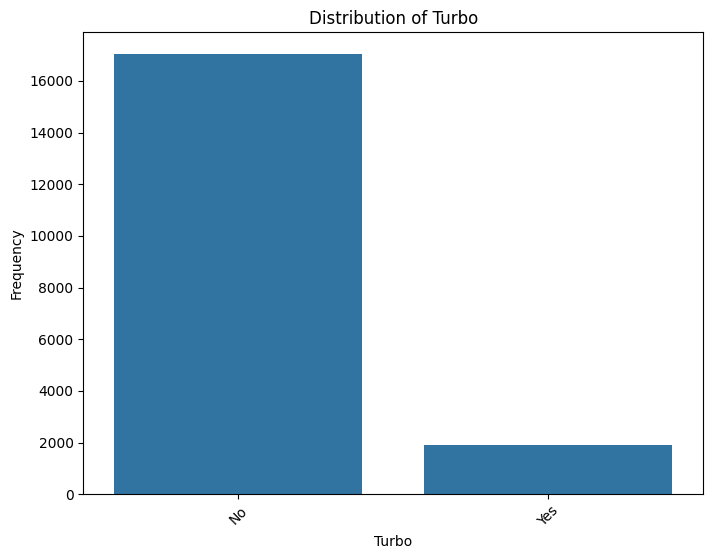

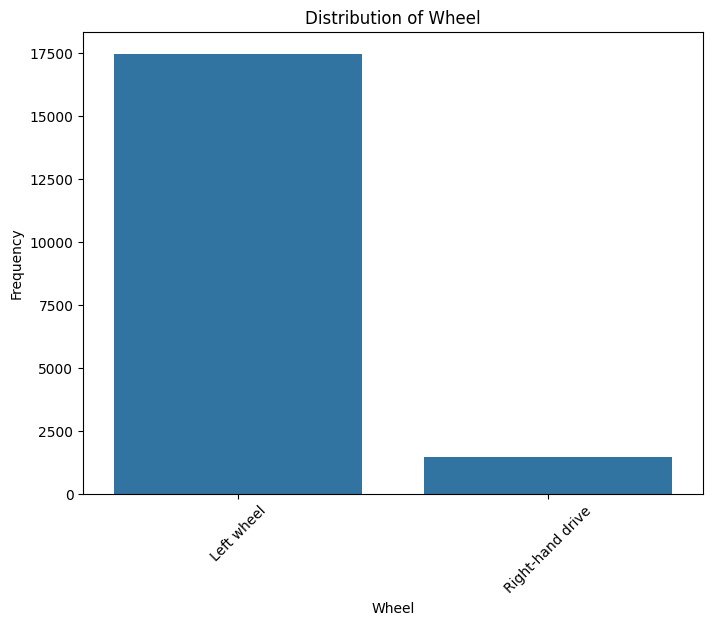

In [23]:
for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=raw_data)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

**Analyse 11 graphs** 

- Distribution of Category Attribute: Sedan appears as the majority of the dataset, followed by Jeeps and Hatchbacks which make the distribution is highly imbalanced. Other categories such as Coupes, and Minivans are much less in quantity. 

- Distribution of Color:  Silver, Black and White are the three most common car colour. Overall, the graph illustrates skew left in the distribution towards neutral colours (Silver, Black and White) and vibrant colours (Red, Blue and Green) are much less frequent. 

- Distribution of Doors: The distribution can be seen as heavily concentrated, which means most of the car’s model are Sedan, Hatchbacks and Jeeps with the number of cars that have 4 to 5 doors majority. 

- Distribution of Drive wheels: ‘4X4’ and ‘Rear’ attributes occupy a small amount while Front drive wheels dominate the dataset. 

- Distribution of Fuel Type: Up to now, gasoline (Petrol) has always been the fuel that accounts for the largest quantity, follow by Diesel and Hybrid. Therefore, CNG and LPG only count for a small amount and Plug-in-Hybrid negligible surplus. 

- Distribution of Gear Box type: The distribution presents that most cars engine in dataset are automatic transmission while manual transmission and tiptronic are less frequent. This features is related to the model’s type as nowadays Sedan cars are mostly automatic gear box type. 

- Distribution of Leather interior: Most cars have leather interiors and more than double the number of cars that do not have. 

- Distribution of Manufacturer: The dataset contains 65 unique manufacturers from all over the world, but the most popular cars production are from Japan, Korea and Germany. The distribution is highly imbalance as the Hyundai represents the majority of the dataset, follow by Toyota and Mercedes-Benz. On the other hand, some manufacturers have very few entries such as Tesla, Pontiac, Saturn or Aston Martin (only 1 car in the dataset).  It is clearly that the graph is skew to the left side. 

- Distribution of Model: The distribution chart of cars model have many similarities in addition to strong correlation to the Manufacturers attributes. This explain why the top five highest variables are: 

	* Prius: 1,083 entries 

	* Sonata: 1,079 entries 

	* Camry: 938 entries 

	* Elantra: 922 entries 

	* E 350: 542 entries 

They are the models from Toyota, Hyundai and Mercedes Benz, significantly more numerous than other models. Luxury cars model from brands like Aston Martin are barely even visible on the chart. 

  

- Distribution of Turbo: The number of cars with turbo is five times higher than the one without it, this is related to the number of Sedan’s model type. Most of the Sedan model doesn’t have turbo because of its higher price in addition to users requirements. 

- Distribution of Wheel: The distribution indicates that most car users are left hand drive, which is popular in European Countries and The US. Right hand drive is common for Asian countries like Japan and Korea. The reason for this disparity distribution might be due to the dataset’s origin and target market 

# **Step 4. PREPARE THE DATA**

**Remove Outliers:**

The team applied the Interquartile Range (IQR) method to detect and remove outliers from the dataset. We set the range between the first quartile (Q1) and the third quartile (Q3) and outliers value is considered as the upper bound and lower bound based on the IQR calculation. With target outcome of less outliers and better distribution model, we calculated the value Q1 (below Q1 - 1.5 * IQR) and Q3 (above Q3 + 1.5 * IQR). Besides that, ‘np.percentile()’ fuction is also used to calculate the 25th percentile (Q1) and the 75th percentile (Q3). It is very important in calculating IQR and define outliers. 

This cell is to inspect the number of outliers that may affect the prediction on the Price label. The outliers if counted if its value is higher or lower than the threshold of IQR. 

In [24]:
def remove_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - factor * iqr
    upper_bound = Q3 + factor * iqr
    return lower_bound, upper_bound

lower_bound, upper_bound = remove_outliers_iqr(raw_data['Price'], factor=1.5)
price_column = raw_data['Price']

outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers in terms of label data.
raw_data = raw_data[~outliers]


Number of outliers: 1055


Subplots: The team sets up a 1x2 grid of subplots with the size of 14x4 inches.  

Boxplots: The boxplot of price column is created with coloured light coral; we also adjust the space between subplots to prevent overlapping 

Histogram of price: The graph displays the distribution of Price attributes and divided the data into 30 intervals (Bins = 30), we also added the KDE curve to demonstrates the probability density of the price. 

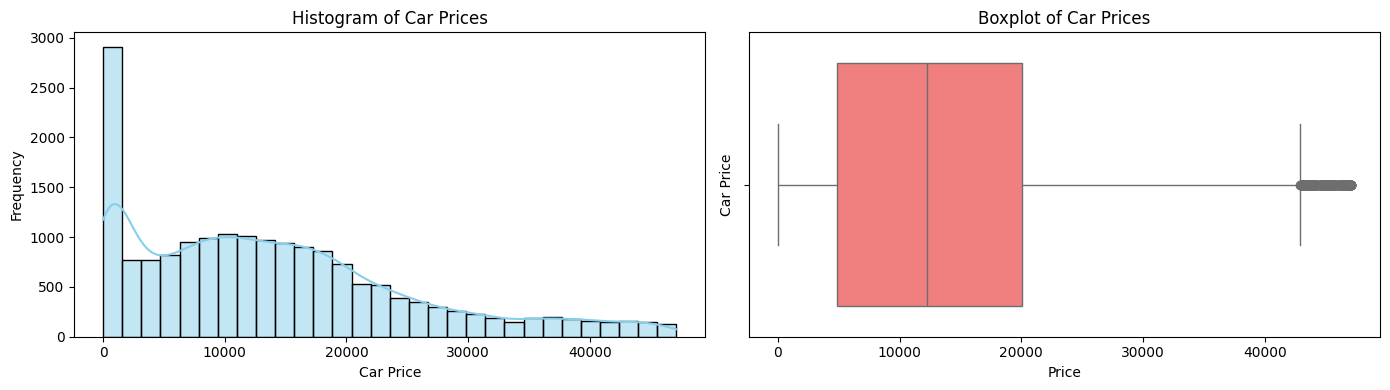

In [25]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram
sns.histplot(raw_data['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Car Prices')
axes[0].set_xlabel('Car Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=raw_data['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Car Prices')
axes[1].set_ylabel('Car Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Key features and analysis:**

Histogram of Price: 

- The histogram shows a right-skewed distribution, indicates that most cars have lower prices and the higher the price of the car, the fewer the quantity. There significant number of cars are priced around 0 to 5000 and the frequency decreases as the price increases. Lastly, the KDE curve provides a smooth and clear graph of distribution of the skewness towards the lower prices. 

  

Boxplot of price: 

- The boxplot provides a summary of price distribution and the interquartile range (IQR), located in the middle 50% of the data. The median price is presents in the box, which is around 14,583. It is also displaying the outliers in the dataset of the price, which can be seen in the grey points to the far right, suggesting expensive cars. 

**Remove Outliers:**

The team applied the Interquartile Range (IQR) method to detect and remove outliers from the dataset. We set the range between the first quartile (Q1) and the third quartile (Q3) and outliers value is considered as the upper bound and lower bound based on the IQR calculation. With target outcome of less outliers and better distribution model, we calculated the value Q1 (below Q1 - 1.5 * IQR) and Q3 (above Q3 + 1.5 * IQR). Besides that, ‘np.percentile()’ fuction is also used to calculate the 25th percentile (Q1) and the 75th percentile (Q3). It is very important in calculating IQR and define outliers. 

- Filter the ‘Price’ attribute with the minimum value of 500, remove the extreme values. 

- For 'Levy', 'Engine volume', 'Mileage', 'Cylinders' attributes, use ‘loop’ function to filter and detect rows that include outliers using IQR method. 

- Delete the outlier values and then create a dataset with the processed data. 

- By removing outliers, the analysis or model building process will become easier and more accurate; eliminate the possibility extreme values can distort results. 



In [26]:
# Columns to check for outliers 
columns_to_check = ['Levy', 'Engine volume', 'Mileage', 'Cylinders']

outlier_counts = {}

# Function to remove outlier
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count


raw_data = raw_data[raw_data['Price'] >= 500]

# Iterate through the columns and delete outliers
for column in columns_to_check:
    raw_data, count = remove_outliers_iqr(raw_data, column)
    outlier_counts[column] = count

# Display number of outliers
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 2302
Engine volume: 292
Mileage: 529
Cylinders: 2321


The table shows the summary of the dataset after applied IQR method to remove outliers. The dataset is now cleaner, easier to analyse without worring about the distortion caused by extreme values.  

Compare to the old dataset, there were unrealistic negative values appear in the Price, Levy, Mileage, and Airbags attributes and all of them have been remove. Besides that, the maximum values appear in Price, Levy, Mileage, and Airbags attribute have been decrease slightly, indicates that some outliers were removed. Means value remain the same, indicates that data’s central tendency was not affect by removing outliers at all. However, the IQR method results in the range (max and min), which are more realistic.  

For example: 

`‘Mileage’ attribute:`

- Old Table: 

* Mean: 127,390 km 

* Min: -93,861 km (negative mileage value,  unreasonable) 

* Max: 343,102 km 

 

- New Table: 

* Mean: 127,390 km (remains the same) 

* Min: 0 km (negative mileage removed) 

* Max: 343,047 km (slightly lower maximum) 

**Conclusion:** Indicating some outliers removed as the negative mileage is deleted and the maximum value is slightly reduced. 

**Raw data after removal:**

The table displays the structures and summary of the dataset after removing the outliers 

**Key features:** 

- Total entries: there are 10,792 entries (rows) in the dataset after the removal of outliers, some rows with extreme values were deleted during handling process. 

- Columns: 18 columns (features), including numerical columns and categorical columns. They are listed with name, the non-null count and data type 

- Non-nun count: There are 10,792 non-nun entries, suggest that there will be no missing values occur in any of the column 

- Data types: Object, Float64, Int64, Category 

The data summary is crucial for understanding the current state of the dataset before processing any further state such as data cleaning or modelling. 

In [27]:
raw_data.info() # after removal

<class 'pandas.core.frame.DataFrame'>
Index: 10792 entries, 2 to 19234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             10792 non-null  int64   
 1   Levy              10792 non-null  float64 
 2   Manufacturer      10792 non-null  object  
 3   Model             10792 non-null  object  
 4   Category          10792 non-null  object  
 5   Leather interior  10792 non-null  object  
 6   Fuel type         10792 non-null  object  
 7   Engine volume     10792 non-null  float64 
 8   Mileage           10792 non-null  float64 
 9   Cylinders         10792 non-null  float64 
 10  Gear box type     10792 non-null  object  
 11  Drive wheels      10792 non-null  object  
 12  Doors             10792 non-null  category
 13  Wheel             10792 non-null  object  
 14  Color             10792 non-null  object  
 15  Airbags           10792 non-null  int64   
 16  Turbo             10792 non

**Analyze categorical columns and Feature Engineering**
There are 'Manufacturer' feature and 'Model' features that is hard to visualize because of the graphs' limitations. So each type is counted be the command value_counts().

In [28]:
raw_data['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          2859
TOYOTA           2058
CHEVROLET         779
FORD              678
HONDA             628
MERCEDES-BENZ     462
NISSAN            423
VOLKSWAGEN        404
SSANGYONG         396
OPEL              319
KIA               314
SUBARU            201
MITSUBISHI        198
BMW               176
LEXUS             129
MAZDA             111
AUDI               95
DAEWOO             90
FIAT               69
JEEP               62
SUZUKI             49
VAZ                39
MINI               38
DODGE              37
RENAULT            33
SKODA              16
PEUGEOT            14
JAGUAR             10
BUICK              10
CHRYSLER            9
UAZ                 9
GMC                 8
DAIHATSU            8
SCION               7
CITROEN             6
LAND ROVER          5
GAZ                 5
ACURA               4
VOLVO               4
CADILLAC            4
ROVER               3
LINCOLN             3
INFINITI            3
ALFA ROMEO          3
MERCURY            

In [29]:
raw_data['Model'].value_counts()

Model
Elantra      852
Prius        728
Sonata       631
Camry        516
Tucson       362
            ... 
Cruze LTZ      1
09-Mar         1
Jetta 2.0      1
Hiace          1
Optima ex      1
Name: count, Length: 951, dtype: int64

**Check normality after removing outliers:**

In [30]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable  Skewness  Kurtosis           Mean    Median       Std Dev  \
0           Levy -0.241875 -0.553952     793.388950     831.0    159.048289   
1  Engine volume  0.342326  0.244149       1.923184       2.0      0.382479   
2        Mileage  0.502619 -0.052766  124760.265845  119989.5  74654.901617   
3      Cylinders  0.000000  0.000000       4.000000       4.0      0.000000   
4        Airbags  0.396975 -0.951874       6.005374       4.0      3.885867   
5            Age  1.833493  6.301523      13.051612      12.0      5.517415   

   Potential Normal  
0              True  
1              True  
2              True  
3              True  
4              True  
5             False  


**Import histogram of price column:** 

  

The team import the Matplotlib library for plotting, which is used for interactive visualization and animated. The figure is set to 8x4 inches size to have clear dimensions. The figure is displayed with ‘Title’, X-label (presenting the car prices) and Y-label (represent the frequency) 

The histogram displays the distribution of car prices in the dataset. Overall, it can be seen as left-skewed distribution, suggesting the number of cars with lower prices is larger than the number of cars with higher prices. 

The highest frequency is in the price range at 5000, suggesting a large number of cars in the dataset is inexpensive 

Towards the right, there are fewer cars which ranging at around 30000 to 40000, suggesting that expensive cars are less popular. 

The histogram is divided into 30 bins, demonstrates the cars’ proportion that fall into each price range. The bin widths display the interval of 1500, it is depended on the data distribution. 

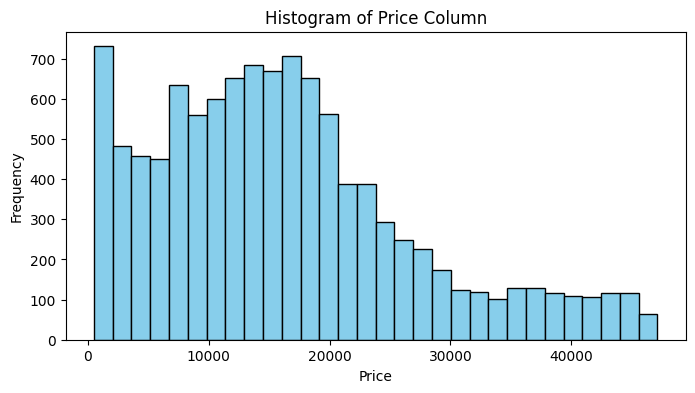

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(raw_data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Heatmap:**

Correlation heatmap is provided to represent the relationship between all numerical variables. The selected data are columns with integer (int64) and floating-point (float64). After that, remove the column ‘Cylinders’ as it does not contribute in the correlation analysis. The team used the function ‘corr()’ to compute the correlation matrix. It calculates the relationship between pairs of numerical attributes, suggesting the range from -1 (perfect negative correlation) to 0 (no correlation) and 1 (perfect positive correlation). For the design, the ‘plt.figure(figsize=(6, 4))’ function sets the heatmap size to 6x4 inches with a white background. ‘Viridis’ is the colour gradient that goes from dark to bright, indicates the increase in correlation of the attributes. The 'Cylinders' is considered ineffective because almost its data is 4.

Correlation heatmap describe: 

**Top three most positive correlation:**

-	Levy and Engine Volume (0.29): The correlation suggests that cars with larger engine volume tend to have higher levies. As larger engine volume required higher perfromance which makes the owner pay different fees such as environmental, road or fuel fees.

-	Mileage and Age (0.22): There are a possitive correlation between these two features, indicating that older cars had been used more, results in higher mileage.

-	Price and Engine Volume (0.15): The correlation value suggests that cars with larger engine volume tends to be more expensive. In today’s world, cars with powerful engine and great perfromance usually belong to premium model.

**Top 3 Most Negative Correlations**

-	Age and Price (-0.41): In the opposite direction, the weak correaltion between Age attribute and Price attribute suggests that older cars usually have lower price, which reflect reflects the natural wear and tear of vehicles over time. 

-	Age and Levy (-0.27):  Similar to Price attributes, cars prices decrese as their age increases. This is due to depreciation as older car owners tend to pay less levies and fees because older vehicles generally have lower market value and performance.

-	Airbags and Age (-0.31): Old cars with lower safety standards usually have less airbags compared to mordern car, which results in weak and negative correlation between these 2 features as they are inversely proportional. 


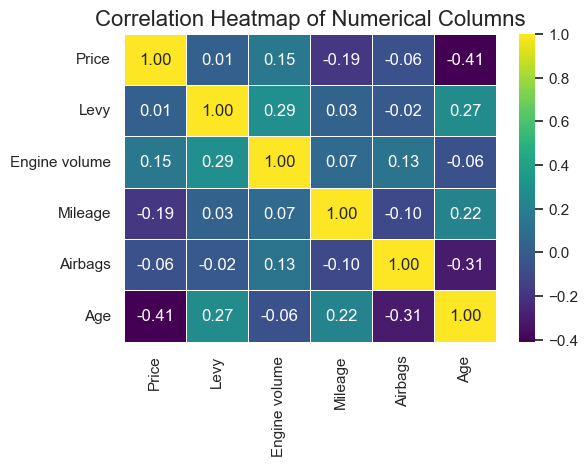

In [32]:
# Select only numerical columns with int64 and float64 data types excluding 'Cylinders'
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap using Seaborn with a different colormap ('viridis')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

# Show the plot
plt.show()


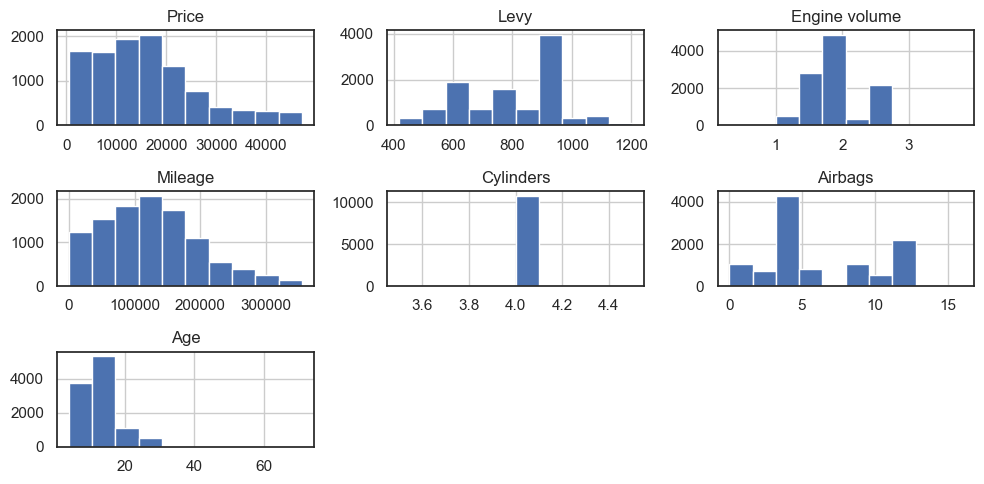

In [33]:
raw_data.hist(figsize=(10,5)) 
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [34]:
normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable  Skewness  Kurtosis           Mean    Median       Std Dev  \
0           Levy -0.241875 -0.553952     793.388950     831.0    159.048289   
1  Engine volume  0.342326  0.244149       1.923184       2.0      0.382479   
2        Mileage  0.502619 -0.052766  124760.265845  119989.5  74654.901617   
3      Cylinders  0.000000  0.000000       4.000000       4.0      0.000000   
4        Airbags  0.396975 -0.951874       6.005374       4.0      3.885867   
5            Age  1.833493  6.301523      13.051612      12.0      5.517415   

   Potential Normal  
0              True  
1              True  
2              True  
3              True  
4              True  
5             False  


After removing the outliers by IQR methods, the features is now normally distributed. However, the Age feature, describing how old the car is, are mostly left-skewed. For instance, it is clear that the 'price' feature distribute more bell-curved compared to the former histogram with a price range from 500 to more than 40000.

In [35]:
print("Types of  distinct manufacturer variables:")
print(len(raw_data['Manufacturer'].value_counts()))

print("Types of  distinct model variables:")
print(len(raw_data['Model'].value_counts()))

print("Types of  distinct category variables:")
print(len(raw_data['Category'].value_counts()))

Types of  distinct manufacturer variables:
54
Types of  distinct model variables:
951
Types of  distinct category variables:
11


It is clear that the nuber of distinct variables of 'Category', 'Model' and 'Manufacturer' categorical features are enormous compared to the others, which only have two or three distinct variables. Thus, using another methods besides OneHotEncoder like Leave - One - Out encoder is more efficient. For Leave One Out, the table will be less sparse compared to the OneHotEncoder since one category was excluded for every observation. 

For the other features, traditional OneHotEncoder is used as usual because it describes each individual thoroughly without causing much of the space complexity

**Strategy:** To get the influence of categorical data, we encode those features differently, we take the 'Category', 'Model' and 'Manufacturer' out and use Leave - One - Out encoder, while the remanings still use OneHotEncoder. We transfer those for usage of the training phase.

## 4.1. Handle Outliers

**Strategy:**
Leave-One-Out Encoding (LOO Encoding) is a feature engineering technique used to treat categorical variables by encoding them based on the target variable's mean, excluding the current instance. The process is as follows:

- For each instance in a given category, calculate the mean of the target variable using all other instances within the same category, excluding the current instance itself.
- Replace the categorical value of the current instance with this mean.

This technique aims to provide a more robust encoding by avoiding data leakage, as it calculates the mean by excluding the target value of the instance being encoded.

Advantages of Leave-One-Out Encoding:

- Reduced Data Leakage: When there is a chance of overfitting to the target variable, LOO Encoding is intended to reduce data leakage issues that might occur during target encoding

- Preservation of Information: LOO Encoding’s target is to provide an objective assessment of the category that effect on the target variable by removing the target value of the instance being encoded.

- Effective for Low Cardinality: Helpful for low cardinality categorical variables, where there are a few examples in a given category

- Adaptability: LOO Encoding is relevant in a variety of supervised learning applications and may be able to fit in different models reasonably

- Avoidance of Overfitting: By offering a more universal encoding technique, LOO Encoding, when applied carefully can help in preventing overfitting to the target variable

**Use LOO to treat ['Manufacturer', 'Model', 'Category'] categorical column**

In [36]:
from category_encoders import LeaveOneOutEncoder

# Select three columns for encoded
columns_to_encode = ['Manufacturer', 'Model', 'Category']

encoder = LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the entire DataFrame
raw_data_encoded = encoder.fit_transform(raw_data[columns_to_encode], raw_data['Price'])

# Concatenate the encoded colums
raw_data = pd.concat([raw_data, raw_data_encoded.add_suffix('_LOO')], axis=1)

In [37]:
# Drop Manufacturer, Model anad Category features
raw_data.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)

# Identify columns with datatype 'object' or 'category'
columns_to_encode = raw_data.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding technique
raw_data_encoded = pd.get_dummies(raw_data, columns=columns_to_encode, drop_first=True)

raw_data_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,False,False,False,False,False,False,False,True,False,False
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,False,False,False,False,False,True,False,False,False,False
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,False,False,False,False,False,False,False,True,False,False
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,2.4,35800.0,4.0,12,10,16107.824281,16243.171887,14175.254347,...,False,False,False,False,False,False,False,False,False,False
19225,8781,1107.000000,1.7,236000.0,4.0,4,17,6982.154088,8076.812500,10417.333333,...,False,False,False,False,False,False,False,False,False,True
19232,8467,906.299205,2.0,300000.0,4.0,5,25,15867.678959,7682.166667,15173.032129,...,False,False,False,False,False,True,False,False,False,True
19233,15681,831.000000,2.4,161600.0,4.0,8,13,20633.586774,13766.833333,14175.928111,...,False,False,False,False,True,False,False,False,False,False


In [38]:
# Loop through columns
for column in raw_data_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if raw_data_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        raw_data_encoded[column] = raw_data_encoded[column].astype(int)

raw_data_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,0,0,0,0,0,0,0,1,0,0
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,0,0,0,0,0,1,0,0,0,0
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,0,0,0,0,0,0,0,1,0,0
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,2.4,35800.0,4.0,12,10,16107.824281,16243.171887,14175.254347,...,0,0,0,0,0,0,0,0,0,0
19225,8781,1107.000000,1.7,236000.0,4.0,4,17,6982.154088,8076.812500,10417.333333,...,0,0,0,0,0,0,0,0,0,1
19232,8467,906.299205,2.0,300000.0,4.0,5,25,15867.678959,7682.166667,15173.032129,...,0,0,0,0,0,1,0,0,0,1
19233,15681,831.000000,2.4,161600.0,4.0,8,13,20633.586774,13766.833333,14175.928111,...,0,0,0,0,1,0,0,0,0,0


## **4.2. Train test split**
At this point, when the data has already transparent and experiencing proper analysis, the team splits the dataset into 70/30, 70% for training the data, and 30% to be used as a test variables. The .shape indicates that the data is well splitted and be ready for the next step.

Because all of the data of 'Cylinders' feature are all *4.0*. So, we remove it.

In [39]:
print(raw_data['Cylinders'].value_counts()) 

Cylinders
4.0    10792
Name: count, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split

X = raw_data_encoded.drop(columns=['Price','Cylinders'])
y = raw_data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(7554, 38)
(7554,)
(3238, 38)
(3238,)


# **Step 5. TRAIN AND EVALUATE MODELS**

**Training Models**

The training model is a process of providing data to a machine learning algorithm to assist in determining and learning optimal values for all relevant attributes. In this scope of the report, we are going to train 6 models which are: 
- Decision Tree model
- Random Forest Regressor Model
- Ridge Regression Model
- Linear Regression Model
- XGBoost Model
- Neural Network Model

The dataset will be divided into 7 parts for training and 3 parts for testing, allowing us to evaluate the performance of each model effectively. This approach ensures a sturdy training procedure and a dependable assessment of every model's efficacy.


## 5.1. Define Metrics and Helper Functions

For the evaluation of each model, we are going to define the function called r2score_and_rmse to calculate the score of r2score and rmse. 

### R2

An A-squared value indicates how well the model predicts the outcome of the dependent variables. R-squared ranges from 0-1.
- Interpretation:
R^2 = 1: The model perfectly predicts the target variance( 100% variance explained)
R^2 = 0: The model explains none of the variance ( it is no better than a mean-based model)
R^2 <0: The model is worse than a mean-based model.

**Formular:**

It is best to use the R^2 score to evaluate the goodness of fit of the model, but may not always indicate how well the model performs on unseen data.

ref: https://www.investopedia.com/terms/r/r-squared.asp
### RMSE
RMSE is a measure of the average magnitude of errors between the predicted value and the actual value. It’s the square root of the mean of square errors.
- Interpretation:
Lower RMSE: Indicates better fit of the model to the data, as it compares between the predicted data and the actual value.
Higher RMSE: Indicates the worst fit, with a larger value.

**Formular:**

RMSE is useful when it comes to predicting mistake size because greater errors would give more weight, making it vulnerable to outliers.

### Helper function

To calculate the R2 score and RMSE score in this program, we are going to define a function called r2score_and_rmse that accepts the model, the train_data, and the labels. From that, the function can return the r2score and rmse based on the training model with a training data set and the chosen features.

As we need to prevent having to retrain the model after completing each training segment, saving and loading the trained model is also essential. The 'store_model' and 'load_model' functions work together to load the model after a training circle and save it at the end of each train.

In [41]:
from sklearn.metrics import mean_squared_error

# function for calculate r2 score and rmse score
def r2score_and_rmse(model, train_data, labels):
    r2score = model.score(train_data, labels)
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse

# function to store model to the folder `models`
def store_model(model, model_name=""):
    if model_name == "":
        model_name = type(model).__name__
    joblib.dump(model, 'models/' + model_name + '_model.pkl')

# function to load the available models from the folder `models ``
def load_model(model_name):
    model = joblib.load('models/' + model_name + '_model.pkl')

    return model

## 5.2. Training Six Models
**Model choosing explanation:**

The chosen models are based on the dataset's nature, to observe the performance of models that fit well with linear data and that perform poorly in such conditions. We also considered a model that can handle both categorical data and numerical data. By evaluating these models, we can see how each one performs differently and determine which model is best suited for the dataset's characteristics.

### Linear Regression

Linear Regression is best suited for dataset that has features that have linear relationship with the target. Since we have numerical and categorical features, the model can perform well for them if they have a linear relationship with the target variable [1]. However, categorical features may struggle to capture complex patterns, so they need to be transformed into a numerical format using techniques like one-hot encoding or dummy variables to improve the model's performance [2].

The outcome of linear regression is as expected. The model does not perform well for the non-linear data which results in a very low score of R2 score RMSE score even in train data sets or test data. Since there is no notable difference between the scores on the training and test sets, this indicates that the model is neither severely overfitting nor underfitting.
An R² score of around 0.52 means that about 50% of the variance in the target variable (Price) can be explained by the features in your model. The RMSE suggests that the model's predictions have an average error of approximately ±7,383.56 on the training data. This indicates the range of errors.

The prediction array and labels array show the predictions of the model and the actual value. 


In [42]:
new_training = 0

if new_training: 
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="LinearRegression")
else:
    model = load_model("LinearRegression")


# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
# Analyze performance
print('_____________LINEAR REGRESSION MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________LINEAR REGRESSION MODEL PERFORMANCE_________

 R2 Score (train data): 0.5229983095397257

 RMSE (train data): 7383.867303648206

Predictions:  [14370.5 21019.7 18812.1 25514.1 15463.7  9871.3 31480.9 17253.4 30486.1]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


### Ridge Regression

The model is among the various regularization schemes for linear regression models. Regularization of the model helps to reduce overfitting. Regression analysis with ridge regression explicitly accounts for multicollinearity. This is helpful when creating large-parameter machine learning models, especially when those parameters have high weights [5].

Similarly, with linear regression, Ridge Regression does not perform well on non-linear data. The score shows that it can only explain only 50% of the variance. 

In [43]:
new_training = 0

if new_training: 
    model = Ridge(alpha=0.1)
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="Ridge")
else:
    model = load_model("Ridge")

# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
# Analyze performance
print('_____________RIDGE MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RIDGE MODEL PERFORMANCE_________

 R2 Score (train data): 0.522998309278009

 RMSE (train data): 7383.867305673861

Predictions:  [14370.6 21019.5 18812.  25514.  15463.6  9871.4 31480.8 17253.5 30486. ]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


### Decision Tree Regressor

Since we must choose a regression data set to train the model, a Decision Tree Regressor will be a good fit since it is a type of supervised learning algorithm used for regression tasks. It works by creating a model that predicts the value of target variables. Since there are interactions between columns within the dataset, the Decision Tree Regressor detects every small variation, even noise in data.

The result shows the outstanding performance of the model. However, the perfect score in R2 score and RMSE score can be due to the overfitting of the model [3].

In [44]:
new_training = 0

if new_training:
    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="DecisionTreeRegressor")
else:
    model = load_model("DecisionTreeRegressor")


# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
# Analyze performance
print('_____________DECISION TREE REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________DECISION TREE REGRESSOR PERFORMANCE_________

 R2 Score (train data): 1.0

 RMSE (train data): 0.0

Predictions:  [20209. 26814. 15994. 29087. 17876.  5959. 38229.   706. 37580.]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


### Random Forest

The model builds multiple decision trees and gathers the results to reach a single endpoint. This reduces the risk of overfitting and increases performance. Since the correlations between the label and the features are quite weak, random forest can be a good choice, because it deals well with non-linear data [4].

The scores show a strong performance of the model. This demonstrates the ability to deal with non-linear data and its ability to predict the price in this data set. It also illustrates a very small error. Additionally, based on the R2 score, it is suggested that the model fits the training data very well. 


In [45]:
new_training = 0

if new_training:
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")


# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)

# Analyze performance
print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score (train data): 0.9971009762116348

 RMSE (train data): 575.6384747414021

Predictions:  [20213.  26799.2 15971.7 29159.7 17876.   5958.4 38211.8   706.  37582. ]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


### XGBoost

XGBoost is an advanced boosting algorithm that builds trees sequentially, improving performance with each iteration. It is well-suited for complex datasets with non-linear interactions [6]. The model can be a strong candidate for our data set, it can effectively handle both numerical and categorical data, and its boosting mechanism can uncover complex relationships between features and the target.

XG-boost is well-suited to non-linear data sets proven by its dominant score on R2 and RMSE. The RMSE of 510.43 shows that the model’s average prediction error is around 510 units, which is quite low, especially compared to other models.

It is also proving the precision as shown in the prediction array and label array. The scores demonstrate that XGBoost is one of the best models.

In [46]:
new_training = 0

if new_training:
  model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
  model.fit(X_train_scaled, y_train)
  store_model(model, model_name="XGBoost")
else:
  model = load_model("XGBoost")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)

print('_______SCORE FOR XGBOOST_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR XGBOOST_________

 R2 Score (train data): 0.9977205991744995

 RMSE (train data): 510.43083814780954

Predictions:  [20308.6 26613.6 16072.9 29322.5 17806.   5919.2 38203.3   692.1 37633.5]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


### Neural Network

A neural network is a flexible model that can learn both linear and non-linear relationships. The model can perform well on large, complex datasets with hidden structures that simpler models might miss. Based on our dataset, to have the model perform well, it is required to have the numerical data to be scaled, and the categorical data to be one-hot encoded. 
 
The R² score of 0.78 indicates that the neural network model is performing reasonably well, capturing a significant portion of the variance in the data, but not all patterns perfectly. While this is a relatively high score, it is not as strong as models like Random Forest or XGBoost, which are better suited for handling non-linear data interactions. The RMSE score further supports the conclusion that the model has a good fit but may still leave room for improvement in predicting the target variable accurately.

In [47]:
new_training = 0

if new_training:
    # Define the neural network architecture
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.002,  # L2 regularization
        batch_size=32,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=42,
        verbose=True
    )
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="NeuralNetwork")
else:
    model = load_model("NeuralNetwork")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)

print('_______SCORE FOR NEURAL NETWORK_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR NEURAL NETWORK_________

R2 score:  0.7812701835480518
RMSE score:  5000.091116150624

Predictions:  [16514.9 24984.6 15339.6 31259.7 12842.4  7009.9 40094.6  8738.2 37621.6]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


## 5.3. Evaluate models with K-Fold cross validation

**What is k-fold?**
K-fold cross-validation is a robust technique that helps evaluate machine learning algorithms' performance. It ensures that the model generalizes well to unseen data by using different parts of the dataset for training and evaluate. By using K-fold, we can reduce overfitting, exploit the data resources, and provide reliable performance, and it can it used for hyperparameter tuning [7].

We applied K-fold in our model by splitting the data set into 10 which means the process will repeat 10 times with the model trained on K-1 folds and tested on the remaining 1 fold.

For example if K = 5:

· Iteration 1: Train on folds 2, 3, 4, 5, Test on fold 1

· Iteration 2: Train on folds 1, 3, 4, 5, Test on fold 2

· Iteration 3: Train on folds 1, 2, 4, 5, Test on fold 3

· Iteration 4: Train on folds 1, 2, 3, 5, Test on fold 4

· Iteration 5: Train on folds 1, 2, 3, 4, Test on fold 5

This helps to avoid overfitting by training the model repeatedly on different portions of the data.

After K-fold, it shows a significant improvement for each model. Here is the table showing the difference before and after K-fold.

The best model is RandomForest with a 0,98 R2 score, we are going to use it to fine-tune to improve the model and test this model with the test data.

### Models ranks before and after K-Fold cross validation

**Before Applying K-Fold**

| Model Name        | R2     | RMSE    |
| ----------------- | ------ | ------- |
| Decision Tree     | 1.0    | 0.0     |
| XGBoost           | 0.9977 | 510.43  |
| Random Forest     | 0.997  | 575.63  |
| Neural Network    | 0.78   | 5000    |
| Linear Regression | 0.52   | 7383.9  |
| Ridge Regression  | 0.52   | 7383.86 |

Decision Tree > XGBoost > Random Forest > Neural Network > Linear Regress > Ridge

**After Applying K-Fold**

| Model Name        | R2   | RMSE    |
| ----------------- | ---- | ------- |
| Random Forest     | 0.98 | 1531.59 |
| XGBoost           | 0.97 | 1817.78 |
| Decision Tree     | 0.95 | 2190.34 |
| Neural Network    | 0.74 | 5422.36 |
| Ridge Regression  | 0.52 | 7420.41 |
| Linear Regression | 0.52 | 7420.42 |

Random Forest > XGBoost > Decision Tree > Neural Network > Ridge > Lindear

The changes in the score of the model might because of overfitting of the two models such as decision trees and XGBoost. The overfitting of the model can come from its nature since it learns the detail and noise in the training data to extent that it might negatively impact the performance of the model on new data.


In [48]:
from sklearn.metrics import make_scorer

# Custom scorer for RMSE
rmse_scorer = make_scorer(root_mean_squared_error)

print('\n____________ K-fold cross validation ____________')

run_new_evaluation = 0

if run_new_evaluation:
    cv = KFold(n_splits=10, shuffle=True, random_state=37)

    # DECISION TREE
    model_name = "DecisionTreeRegressor"
    model = DecisionTreeRegressor(random_state=42)
    
    # Cross-validation scores for RMSE and R²
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'DecisionTreeRegressor R²: {np.mean(r2_scores):.2f}')
    print(f'DecisionTreeRegressor RMSE: {np.mean(rmse_scores):.2f}\n')

    # RANDOM FOREST
    model_name = "RandomForest"
    model = RandomForestRegressor(random_state=42)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'RandomForest R²: {np.mean(r2_scores):.2f}')
    print(f'RandomForest RMSE: {np.mean(rmse_scores):.2f}\n')

    # RIDGE
    model_name = "Ridge"
    model = Ridge(alpha=0.1)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Ridge R²: {np.mean(r2_scores):.2f}')
    print(f'Ridge RMSE: {np.mean(rmse_scores):.2f}\n')

    # LINEAR
    model_name = "Linear"
    model = LinearRegression()

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Linear R²: {np.mean(r2_scores):.2f}')
    print(f'Linear RMSE: {np.mean(rmse_scores):.2f}\n')

    # XGBOOST
    model_name = "XGBoost"
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'XGBoost R²: {np.mean(r2_scores):.2f}')
    print(f'XGBoost RMSE: {np.mean(rmse_scores):.2f}\n')

    # NN
    model_name = "NeuralNetwork"
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.002,  # L2 regularization
        batch_size=32,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=42,
        verbose=False
    )

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'NN R²: {np.mean(r2_scores):.2f}')
    print(f'NN RMSE: {np.mean(rmse_scores):.2f}\n')

else:
    # Load saved RMSE and R² scores for each model
    models = ["DecisionTreeRegressor", "RandomForest", "Ridge", "Linear", "XGBoost", "NeuralNetwork"]

    for model_name in models:
        rmse_scores = joblib.load('saved_objects/' + model_name + '_rmse.pkl')
        r2_scores = joblib.load('saved_objects/' + model_name + '_r2.pkl')
        print(f"{model_name} R²: {np.mean(r2_scores):.2f}", end=' ')
        print(f"\n{model_name} RMSE: {np.mean(rmse_scores):.2f}\n")


____________ K-fold cross validation ____________
DecisionTreeRegressor R²: 0.95 
DecisionTreeRegressor RMSE: 2190.34

RandomForest R²: 0.98 
RandomForest RMSE: 1531.59

Ridge R²: 0.52 
Ridge RMSE: 7420.41

Linear R²: 0.52 
Linear RMSE: 7420.42

XGBoost R²: 0.97 
XGBoost RMSE: 1817.78

NeuralNetwork R²: 0.74 
NeuralNetwork RMSE: 5422.36



# **Step 6: FINE-TUNE THE BEST MODEL**

Finetuning is the same technique where the model is again trained multiple times but this time using hyperparameters to control how the model learns. We also need to initialize a random search cv to retrain the model repeatedly and try all the combinations of hyperparameters of the predetermined grid. It will choose the best combination based on the giving scoring metrics [8].

In this project, we are going to random search. The reason why we chose random search is because it is faster than other methods such as grid search. Unlike grid search, a random subset of hyperparameter combinations is selected.

**Hyperparameter Explanation and Justification**

The proposed model was fine-tuned using a specific set of hyperparameters. Below is a description of each parameter and the rationale behind the chosen values:

n_estimators: [100, 200, 250]
This parameter controls the number of trees in the forest. The default value of 100 was chosen as a starting point, with higher values tested to explore if additional trees improve model performance without adding excessive computational cost.

min_samples_split: [2, 4, 5]
This parameter determines the minimum number of samples required to split a node. The default value of 2 allows maximum flexibility in splitting, while testing higher values helps explore whether restricting splits improves generalization and avoids overfitting.

min_samples_leaf: [1, 3, 5]
This controls the minimum number of samples needed at a leaf node. The default of 1 allows for detailed splits, but testing higher values can help smooth predictions and reduce overfitting, improving the model’s generalization ability.

bootstrap: [True, False]
This parameter decides whether to use bootstrap sampling when building trees. The default value is True, but testing False helps assess whether using all the data without replacement leads to better model performance.

max_depth: [None, 10, 20]
This parameter controls the maximum depth of each tree. The default None allows trees to grow fully but testing depths of 10 and 20 helps determine if limiting tree depth reduces overfitting while maintaining accuracy.

These hyperparameters were selected because they directly influence model complexity and performance. Testing different combinations allows us to balance overfitting and underfitting, ensuring the model is well-tuned to the dataset for optimal performance.


In [49]:
from sklearn.model_selection import RandomizedSearchCV

def print_search_result(random_search):
    print('Best hyperparameter combination: ', random_search.best_params_)
    print('Best rmse: ', np.sqrt(-random_search.best_score_))
    print('Best estimator: ', random_search.best_estimator_) 
    print('Performance of hyperparameter combinations:')
    cv_results = random_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params)

new_run = 0
if new_run:
    # Adjust the param_grid for RandomizedSearchCV with distributions
    param_dist = {
        'n_estimators': [100, 200, 250],       # Number of trees
        'min_samples_split': [2, 4, 5],        # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 3, 5],         # Minimum number of samples required at a leaf node
        'bootstrap': [False, True],            # Whether bootstrap samples are used when building trees
        'max_depth': [None, 10, 20]            # Maximum depth of the tree
    }

    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(random_state=42)

    # Initialize the RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                       n_iter=50, scoring='neg_mean_squared_error',
                                       cv=5, n_jobs=-1, verbose=1, random_state=42)

    # Fit the random search model on the training data
    random_search.fit(X_train_scaled, y_train)

    # save the random search
    joblib.dump(
        random_search, 'saved_objects/RandomForestRegressor_randomsearch.pkl')

    # Print the results
    print("\n ---------------------------Fine-tune Random Forest Regressor---------------------------")
    print_search_result(random_search)

else:
    random_search = joblib.load('saved_objects/RandomForestRegressor_randomsearch.pkl')
    print("\n ---------------------------Fine-tune Random Forest Regressor---------------------------")
    print_search_result(random_search)



 ---------------------------Fine-tune Random Forest Regressor---------------------------
Best hyperparameter combination:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best rmse:  1604.7379951956275
Best estimator:  RandomForestRegressor(n_estimators=200, random_state=42)
Performance of hyperparameter combinations:
rmse = 1841.3 {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 20, 'bootstrap': True}
rmse = 1796.5 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
rmse = 1931.4 {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 10, 'bootstrap': True}
rmse = 2157.9 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
rmse = 1705.4 {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': True}
rmse = 2306.2 {'n_esti

# **STEP 7: ANALYZE AND TEST THE BEST MODEL**

## 7.1. Analyze the imporant features

In this analysis of the RandomForestRegressor model, several key features are identified as the most influential in predicting the cars' price. The most vital figures are Category_LOO, Model_LOO, and Age. On the other hand, features such as Color_Pink, and Color_Purple had a minimal impact on the prediction. 

----------------Features in dataset--------------------
 Index(['Levy', 'Engine volume', 'Mileage', 'Airbags', 'Age',
       'Manufacturer_LOO', 'Model_LOO', 'Category_LOO', 'Leather interior_Yes',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_4-5', 'Doors_>5',
       'Wheel_Right-hand drive', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Turbo_Yes'],
      dtype='object')
                     Feature    Importance
7               Category_LOO  5.572774e-01
6                  Model_LOO  3.005738e-01
4                        Age  9.895777e-02
5           Manufac

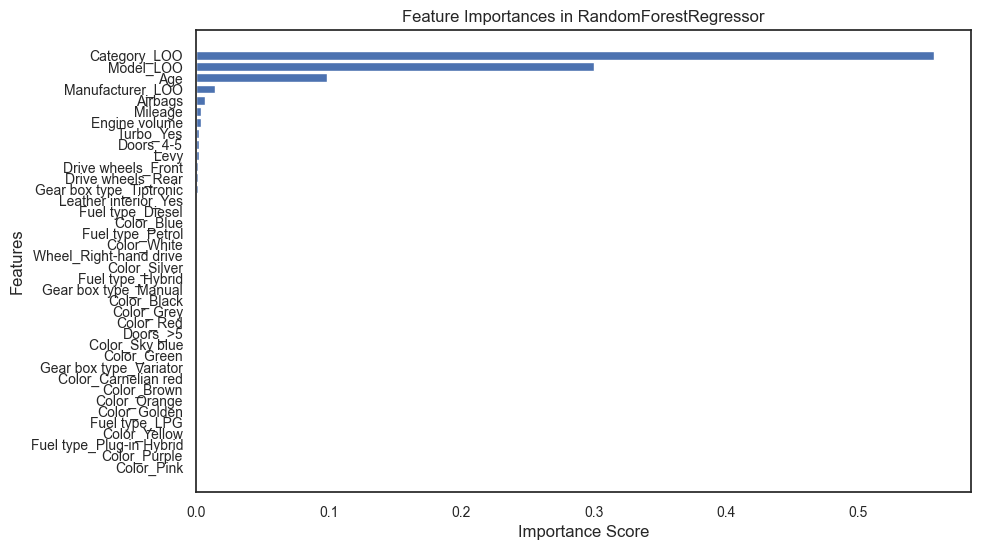

In [50]:
# Load the randomsearch
random_search = joblib.load('saved_objects/RandomForestRegressor_randomsearch.pkl')
best_model = random_search.best_estimator_

# Retrieve feature importances
feature_importances = best_model.feature_importances_

# get the features names in the dataset
feature_names = X_train.columns
print('----------------Features in dataset--------------------\n', feature_names)


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances for visulization
plt.figure(figsize=(10, 6))
# create the horizontal bar chart
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances in RandomForestRegressor")
plt.gca().invert_yaxis()
plt.show()

## 7.2. Analyze the model's performance and generate insights.
The model demonstrates excellent performance with an R2 score of 0.9835, indicating that it explains 98.35% of the variance in the car prices. This suggests the Random Forest model fits the data exceptionally well and can predict car prices with high accuracy. An insight that can be deduced from this result is that a high R2 value indicates that most of the variability in the target variable (car price in this case) can be explained by the features used in the model. Thus, this model captures the important factors that determine car prices very well.

The RMSE is 1389.7, which means that, on average, the predictions deviate from the actual price by around $1389.7. Given the wide range of car prices in this dataset (from $500 to $50,000), this error is small compared to the price range, indicating good model performance. An insight that can be deduced from this result is that the model’s predictions are quite close to the actual values. The RMSE is low relative to the price range implying that the Random Forest model can make accurate predictions for unseen data.

Predictions: [17248.7 17347.2 5331.5 6597.3 706. 35042.2 32425.9 6899.2 14740. ] 

Labels: [17249, 17346, 5331, 6586, 706, 35043, 32929, 6899, 14740]

Looking at the predictions and actual labels, the predicted prices are extremely close to the actual prices, often differing by just a few units. For example, the model predicted 17,248.7 for the first car, while the actual price was 17,249. This demonstrates that the model is highly accurate in most cases.

The best model is RandomForestRegressor ('n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True). The performance of this model on the test set is: 

-	R2 Score: 0.983
-	Root Mean Square Error: 1389.7

In [51]:
print('BEST MODEL FOR THIS DATASET: ', best_model)
store_model(best_model, model_name="BEST MODEL")

r2score, rmse = r2score_and_rmse(
    best_model, X_test_scaled, y_test)
print('\n ------------------Performance of Best Model on Test dataset-----------------')
print('R2 score (on test data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 7.3.2 Predict labels for some test instances
print("\n----------------------Test data---------------------- \n", X_test.iloc[0:9])
print("\nPredictions: ", best_model.predict(
    X_test_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_test[0:9]), '\n')


BEST MODEL FOR THIS DATASET:  RandomForestRegressor(n_estimators=200, random_state=42)

 ------------------Performance of Best Model on Test dataset-----------------
R2 score (on test data, best=1): 0.9835230224935825
Root Mean Square Error:  1389.7

----------------------Test data---------------------- 
              Levy  Engine volume   Mileage  Airbags  Age  Manufacturer_LOO  \
8137   906.299205            1.6   40000.0        2    7      16113.833866   
16350  531.000000            1.6  151136.0        4   12      20633.004199   
13159  906.299205            1.6  200000.0        2   24      15874.481562   
16411  906.299205            1.3  229000.0        4   21      13130.213716   
14285  585.000000            1.8  105328.0       12   11      15194.670880   
14954  640.000000            2.0  110190.0        4   11      30439.870886   
885    906.299205            2.5  135000.0        2   17      12133.370558   
5466   906.299205            1.3  190500.0        4   23      15191.6

# **Conclusion**

In this project, we have successfully developed and trained six models to predict car prices based on the car dataset from Kaggle. Initially, the dataset was challenging and unreliable because of noisy data and outliers. To solve this, we processed the whole data including creating new features, removing outliers, and removing redundant features. Moreover, we applied suitable encoding techniques with Leave - One - Out encoder and One hot encoder to handle categorical features effectively.

After training the models with train data, the score is not reliable. With the K-Fold cross-validation, we can correctly evaluate our best model Random Forest. Then, by using RandomizedSearchCV, we fine-tuned the best hyperparameters for our model to optimize its performance. Finally, the model demonstrated excellent prediction with an amazing score.


**Discuss potential limitations and areas for improvement.**

As shown in the result, the non-linear model performs well on the data set, but the linear models seem to struggle with a very low score. Overall, the training process has reached a very high level of accuracy since the R2 and RMSE scores are quite high for the non-linear models. In contrast, a linear model where the data set does not fit the concept of the model performs poorly. It can be improved by several methods like feature engineering, hyperparameter tuning, or cross-validation. However, it cannot be as good as the non-linear model, since it is designed to fit with those types of data set.


# **Contribution Table**

| Student ID | Student Name         | Contribution Rate (1-100%) | Responsible for (Parts, Cells...) | Note |
| ---------- | -------------------- | -------------------------- | --------------------------------- | ---- |
| s4026694   | Le Nguyen Khuong Duy | 100%                       | Step 1 2 3 4                      |      |
| s3974892   | Ngo Van Tai          | 100%                       | Step 5 6 7                        |      |
| s3971496   | Huynh Hoang Duc      | 100%                       | Step 5 6 7                        |      |
| s3929218   | Huynh Tan Phat       | 100%                       | Step 5 6 7                        |      |
| s3941458   | Duong Manh Huy       | 100%                       | Step 1 2 3 4                      |      |


# **Reference**
[1] IBM, “About Linear Regression | IBM,” www.ibm.com, 2023.https://www.ibm.com/topics/linear-regression 

[2] “Linear vs. Logistic Regression (Differences and Limitations),” Indeed Career Guide. https://ca.indeed.com/career-advice/career-development/linear-vs-logistic-regression 
 
[3]“Overfitting in Decision Tree Models,” GeeksforGeeks, May 02, 2024. https://www.geeksforgeeks.org/overfitting-in-decision-tree-models/ 

‌[4] "Random Forest," ScienceDirect. [Online]. Available: https://www.sciencedirect.com/topics/immunology-and-microbiology/random-forest. [Accessed: 08-Sep-2024]. 

[5] A. E. Hoerl and R. W. Kennard, "Ridge regression: Biased estimation for nonorthogonal problems," Technometrics, vol. 12, no. 1, pp. 55–67, Feb. 1970. 

[6] A. Hachcham, “XGBoost: Everything You Need to Know,” Neptune.ai, 2023. https://neptune.ai/blog/xgboost-everything-you-need-to-know 

‌[7] M. Stone, "Cross-validatory choice and assessment of statistical predictions," J. R. Statist. Soc. B, vol. 36, no. 2, pp. 111–147, 1974. 

[8]“What is Random Search,” Activeloop.ai, 2020. https://www.activeloop.ai/resources/glossary/random-search/#:~:text=In%20artificial%20intelligence%20(AI)%2C (accessed Sep. 08, 2024). 
‌